<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/Nearest_Earth_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
df=pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [44]:
print('Number of unique values in neo_id is ', df['neo_id'].nunique())
print('Number of unique values in name is ', df['name'].nunique())
print('Number of unique values in orbiting_body is ', df['orbiting_body'].nunique())

Number of unique values in neo_id is  33514
Number of unique values in name is  33514
Number of unique values in orbiting_body is  1


In [45]:
df=df.drop('neo_id',axis=1)
df=df.drop('name',axis=1)

In [46]:
df['is_hazardous'].value_counts()

is_hazardous
False    295037
True      43162
Name: count, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   orbiting_body           338199 non-null  object 
 4   relative_velocity       338199 non-null  float64
 5   miss_distance           338199 non-null  float64
 6   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 15.8+ MB


In [48]:
df.isna().sum()

absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

<Axes: >

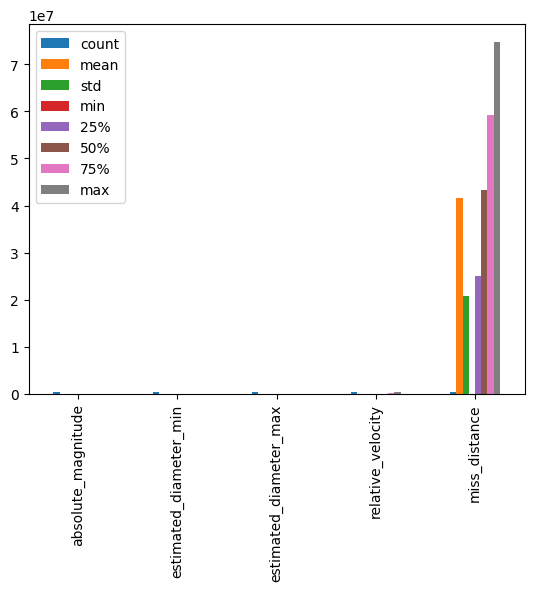

In [49]:
df.describe().T.plot(kind='bar')

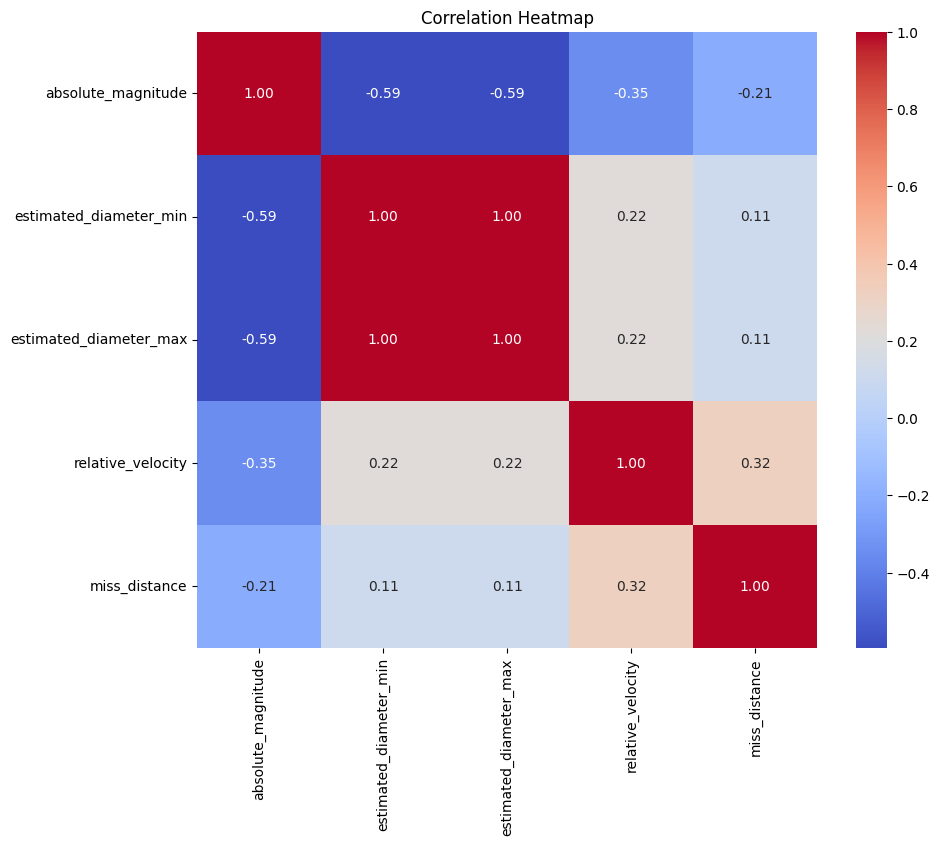

In [50]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
data_subset = df.head(30)

<Figure size 800x600 with 0 Axes>

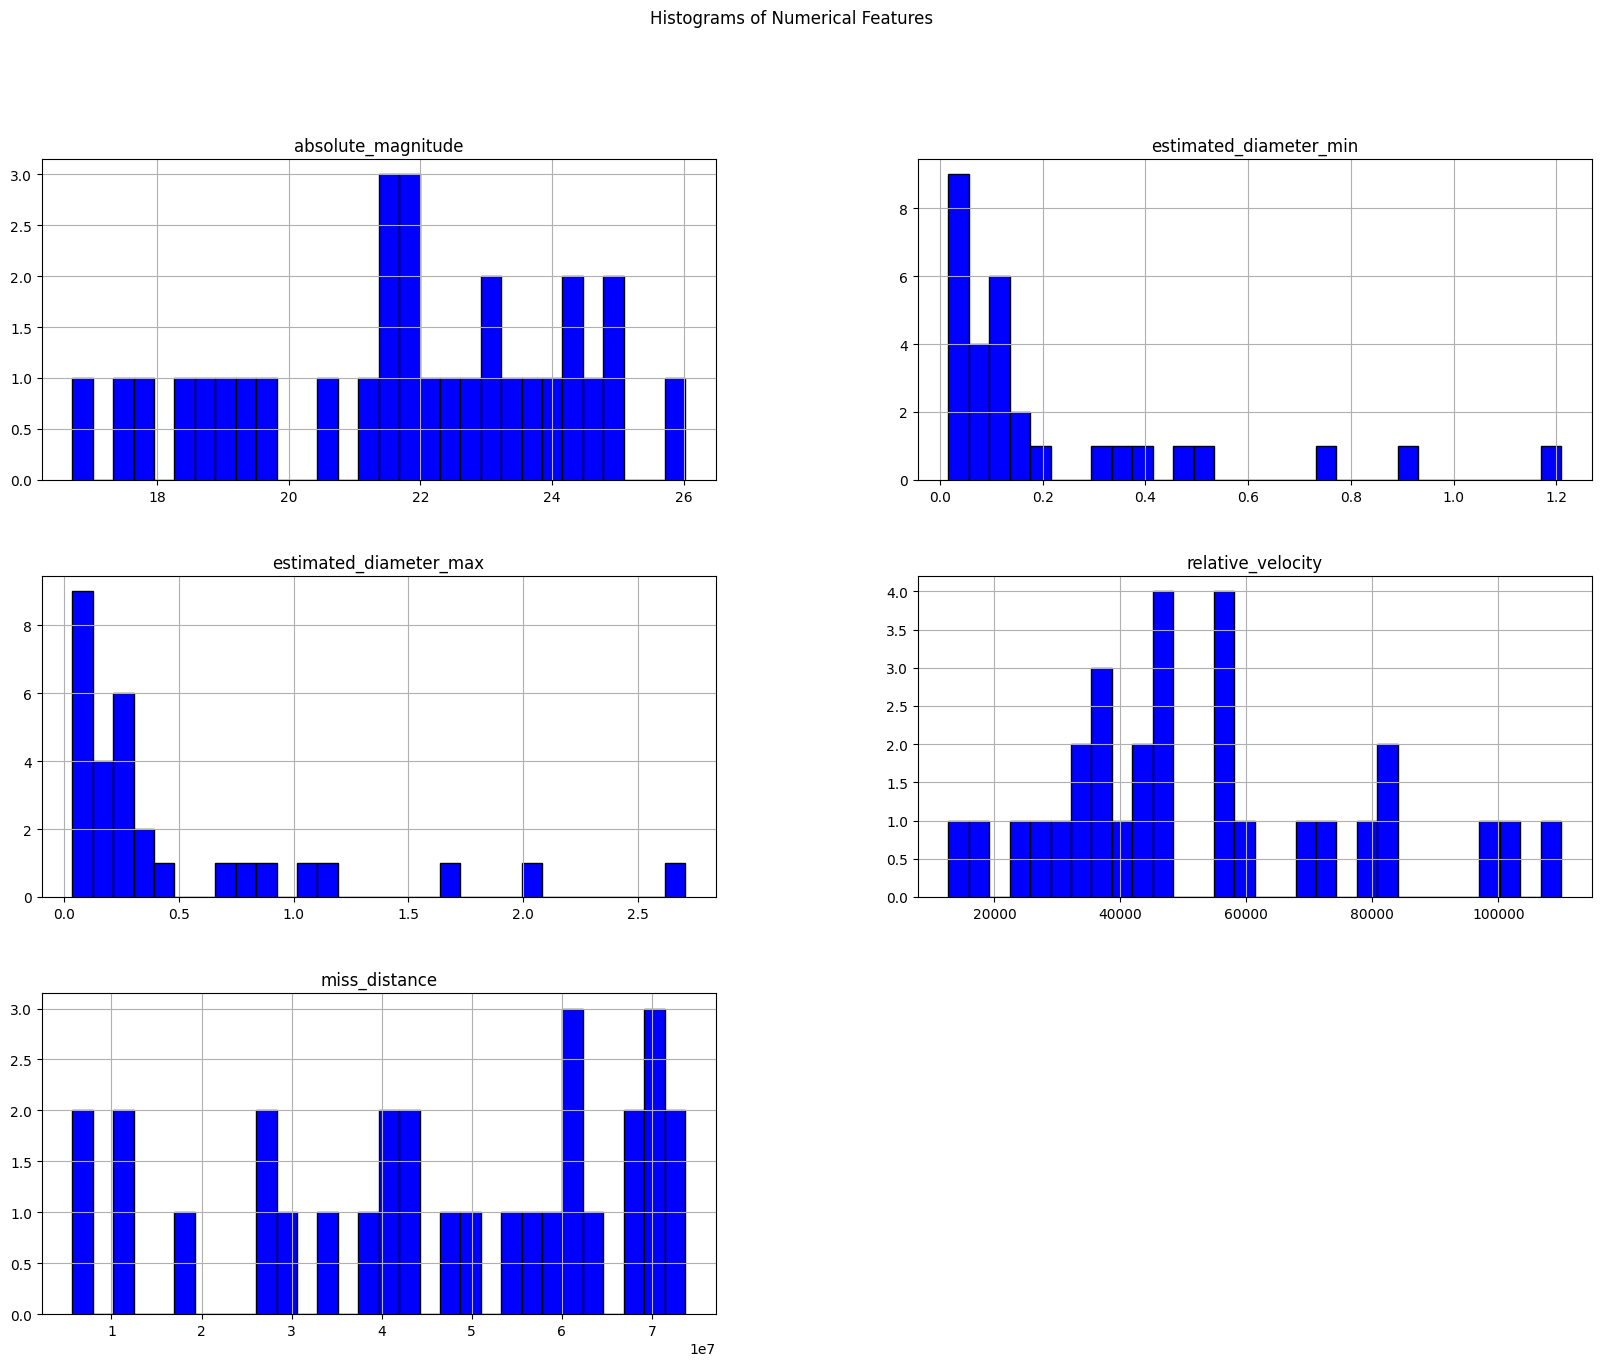

In [52]:
plt.figure(figsize=(8,6))
data_subset.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

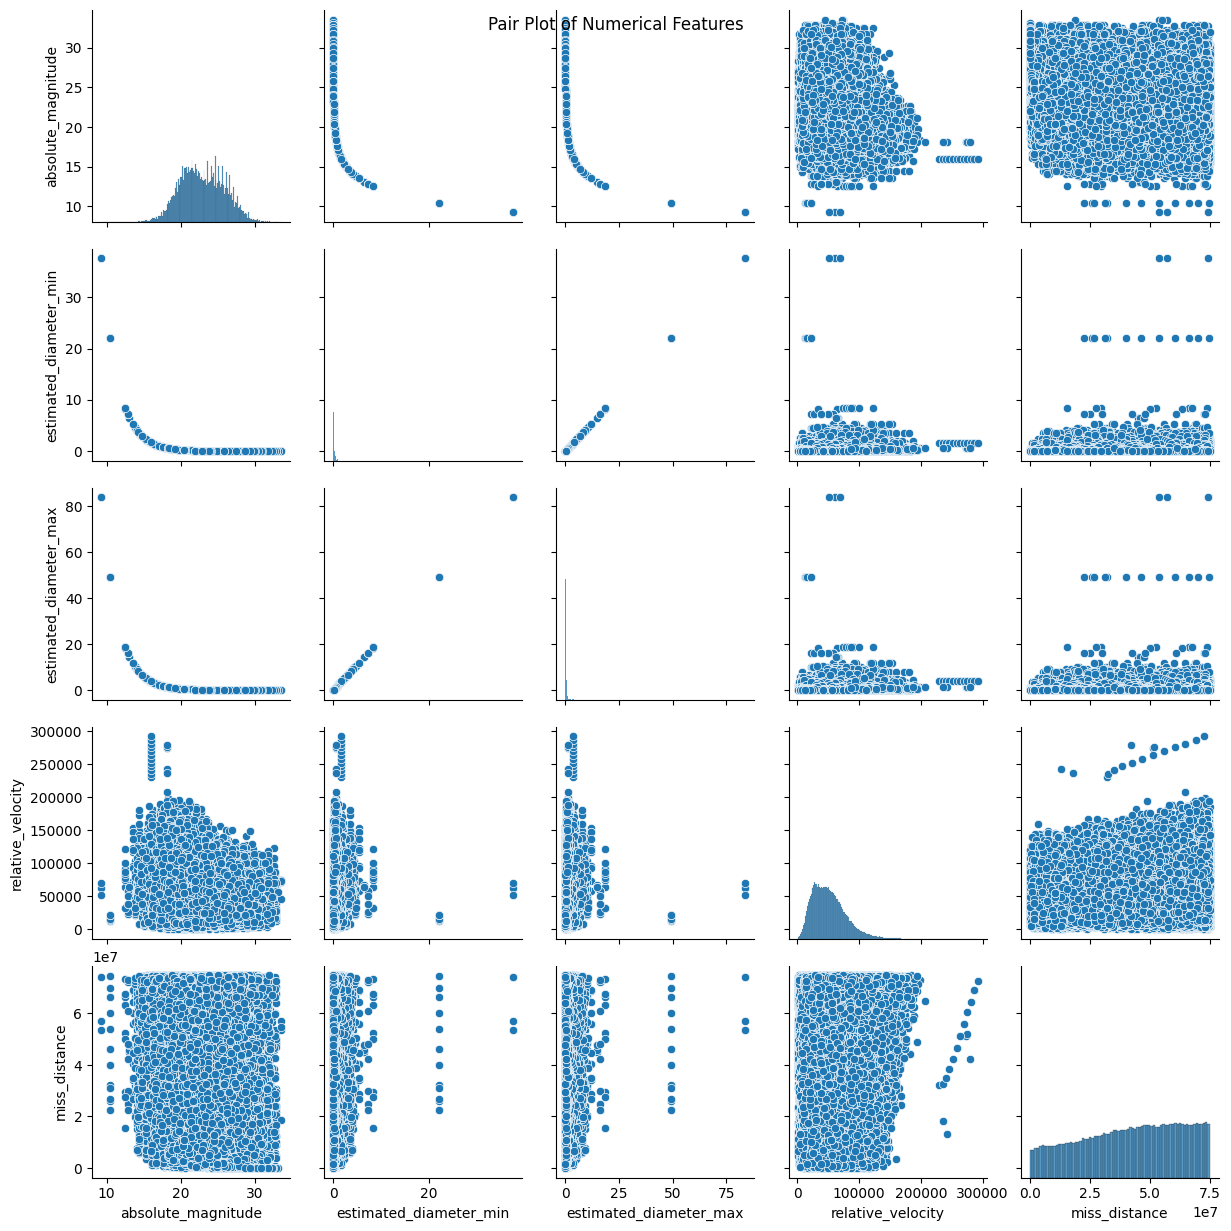

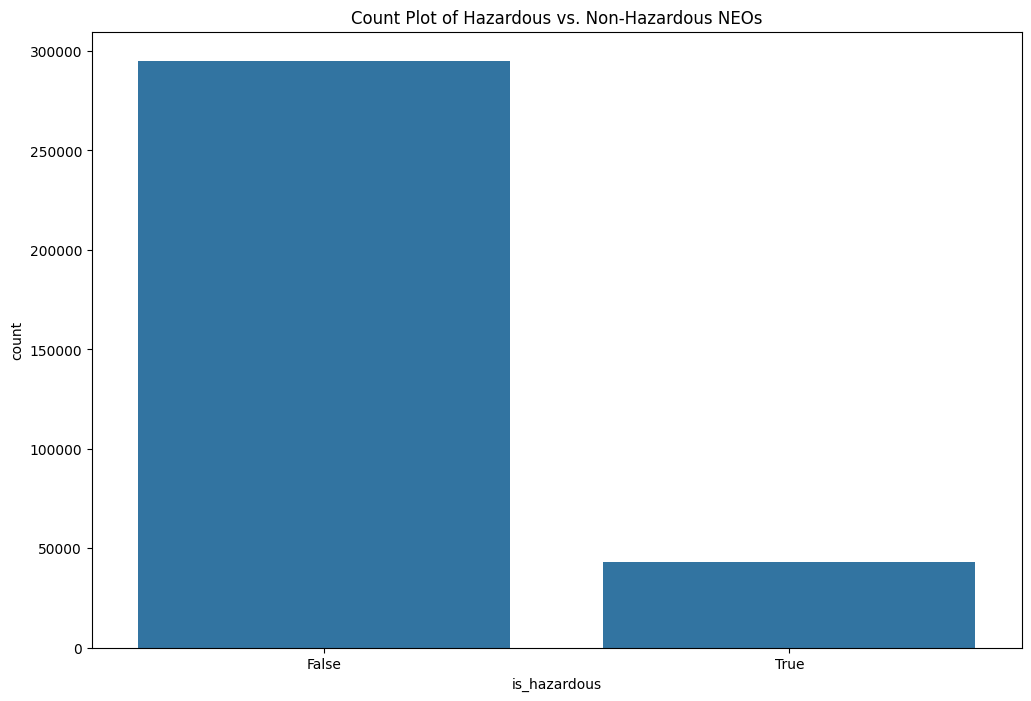

In [53]:
sns.pairplot(df[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

# Count Plot for the 'is_hazardous' feature
plt.figure(figsize=(12, 8))
sns.countplot(x='is_hazardous', data=df)
plt.title('Count Plot of Hazardous vs. Non-Hazardous NEOs')
plt.show()

In [54]:
X=df.drop('is_hazardous',axis=1)
y=df['is_hazardous'].copy()

In [55]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [56]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [57]:
cat_features

Index(['orbiting_body'], dtype='object')

In [58]:
num_features

Index(['absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance'],
      dtype='object')

In [59]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline=make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipeline=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

transformer=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
],remainder='passthrough')

In [60]:
X_transformed_train=transformer.fit_transform(X_train)
X_transformed_valid=transformer.transform(X_valid)
X_transformed_test=transformer.transform(X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [62]:
rnd_clf=RandomForestClassifier(class_weight={-1: 1.0, 0:0.7, 1:0.3})
svc_clf=SVC(class_weight={-1: 1.0, 0:0.7, 1:0.3})
log_reg=LogisticRegression(max_iter=100_000)

In [63]:
rnd_clf.fit(X_transformed_train,y_train)
svc_clf.fit(X_transformed_train,y_train)
log_reg.fit(X_transformed_train,y_train)

LogisticRegression(max_iter=100000)

In [64]:
rnd_clf.score(X_transformed_train,y_train)

0.9999953799313458

In [65]:
y_test = pd.Categorical(y_test).codes

In [66]:
rnd_clf.score(X_transformed_test,y_test)

0.914237137788291

In [67]:
y_valid = pd.Categorical(y_valid).codes

In [68]:
rnd_clf.score(X_transformed_valid,y_valid)

0.9147139266706091

In [69]:
svc_clf.score(X_transformed_train,y_train)

0.872435284388326

In [70]:
svc_clf.score(X_transformed_test,y_test)

0.8725310467179184

In [71]:
svc_clf.score(X_transformed_valid,y_valid)

0.8726530159668835

In [72]:
log_reg.score(X_transformed_train,y_train)

0.8719132166303991

In [73]:
log_reg.score(X_transformed_test,y_test)

0.8717918391484328

In [74]:
log_reg.score(X_transformed_valid,y_valid)

0.8714148432879952

In [75]:
vot_clf=VotingClassifier(
    estimators=[
        ('rnd_clf',RandomForestClassifier(random_state=42)),
        ('svc_clf',SVC(random_state=42)),
        ('log_reg',LogisticRegression(random_state=42,max_iter=100_000))
    ]
    )

vot_clf.fit(X_transformed_train,y_train)
vot_clf.score(X_transformed_train,y_train)

0.8912851644975445

In [76]:
vot_clf.score(X_transformed_test,y_test)

0.8847427557658191

In [77]:
vot_clf.score(X_transformed_valid,y_valid)

0.8848129804849202

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.5,random_state = 1)
X_train_res, y_train_res = sm.fit_resample(X_transformed_train, y_train.ravel())

In [79]:
from sklearn.model_selection import cross_val_predict
y_pred_train = cross_val_predict(vot_clf,X_train_res,y_train_res,cv = 3)

In [80]:
from sklearn.metrics import f1_score
f1_score(y_train_res,y_pred_train)

0.7868543801387036